In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(),"../..")))
from models.cVAE import CVAE
from keras.models import load_model
from Datos.Data_acq import get_mnist_data
#import Data_acq as data
import matplotlib.pyplot as plt
import importlib
from custom_layers.Sampling import Sampling
import importlib
import visualizaciones.visualizar as vis
import tensorflow as tf

x_train, x_test,x_val ,y_train, y_test,y_val, x_train_1, y_train_1 = get_mnist_data()

val_dataset = tf.data.Dataset.from_tensor_slices(((x_val, y_val), x_val))



Usando mnist como dataset


Procesando modelo: int_128_lat_64_mnist



C:\Users\galan\AppData\Roaming\Python\Python312\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


<Figure size 640x480 with 0 Axes>

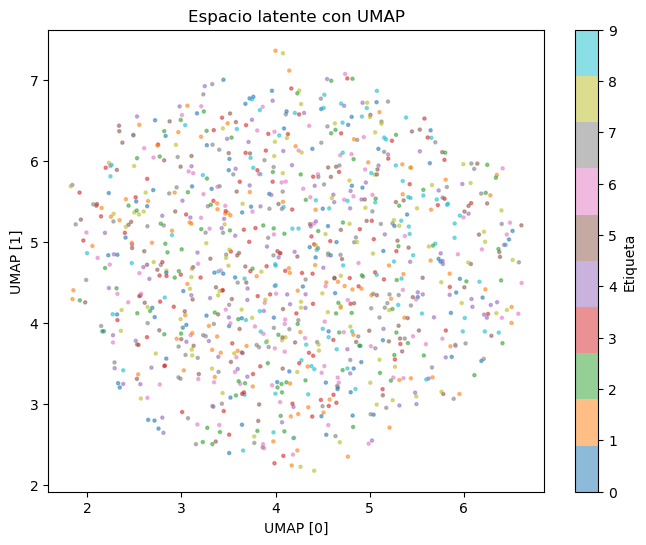

In [2]:

# Carpeta donde están los modelos
encoders_dir = "../../modelos_entrenados/encoders/"
decoders_dir = "../../modelos_entrenados/decoders/"

# Lista de nombres comunes de modelos
model_names = [
    #"int_128_lat_2_mnist",
    "int_128_lat_64_mnist",
    #"int_128_lat_64_mnist_beta_10",
    #"int_256_lat_128_mnist",
    #"int_512_lat_256_mnist"
    
]

for name in model_names:
    print(f"Procesando modelo: {name}")
    encoder_path = os.path.join(encoders_dir, f"en_{name}.keras")
    decoder_path = os.path.join(decoders_dir, f"de_{name}.keras")

    # Cargar modelos
    encoder = load_model(encoder_path, custom_objects={"Sampling": Sampling})
    decoder = load_model(decoder_path)

    # Instanciar CVAE
    cvae = CVAE(encoder=encoder, decoder=decoder, original_dim=28 * 28, beta=1)
    # Graficar espacio latente
    plt.figure()
    vis.latent_space_umap(cvae, val_dataset, max_samples=1000)
#save_path=f"figs/umap_latente_{name}.png"

Los gráficos no muestran espacios latentes con estructura. pero no parece afectar, al rendimiento a la hora de separa digitos. ¿Es un error de visaulización o de entrenamiento?
Los espacios latentes no tiene estrucutra dado que es la concatenación de z(64 128,...) y labels(10). En el caso de dim_lat = 2, los labels tienen mucho peso. y conforme crece el espacio latente los labels pierden peso. 

In [ ]:
#import Data_acq as data
import matplotlib.pyplot as plt
import importlib
from custom_layers.Sampling import Sampling
import importlib
import visualizaciones.visualizar as vis
import tensorflow as tf

x_train, x_test,x_val ,y_train, y_test,y_val, x_train_1, y_train_1 = get_mnist_data()

val_dataset = tf.data.Dataset.from_tensor_slices(((x_val, y_val), x_val))


# Carpeta donde están los modelos
encoders_dir = "../../modelos_entrenados/encoders/"
decoders_dir = "../../modelos_entrenados/decoders/"

# Lista de nombres comunes de modelos
model_names = [
    "int_128_lat_2_mnist",
    "int_128_lat_64_mnist",
    #"int_128_lat_64_mnist_beta_10",
    "int_256_lat_128_mnist",
    "int_512_lat_256_mnist"
    
]
for name in model_names:
    print(f"Procesando modelo: {name}")
    encoder_path = os.path.join(encoders_dir, f"en_{name}.keras")
    decoder_path = os.path.join(decoders_dir, f"de_{name}.keras")

    # Cargar modelos
    encoder = load_model(encoder_path, custom_objects={"Sampling": Sampling})
    decoder = load_model(decoder_path)

    # Instanciar CVAE
    cvae = CVAE(encoder=encoder, decoder=decoder, original_dim=28 * 28, beta=1)


Usando mnist como dataset
Procesando modelo: int_128_lat_2_mnist
Procesando modelo: int_128_lat_64_mnist
Procesando modelo: int_256_lat_128_mnist
Procesando modelo: int_512_lat_256_mnist
[<tf.Tensor: shape=(), dtype=float32, numpy=0.0>, <tf.Tensor: shape=(), dtype=float32, numpy=0.0>, <tf.Tensor: shape=(), dtype=float32, numpy=0.0>, <tf.Tensor: shape=(), dtype=float32, numpy=0.0>]


### Espacio latente durante la inferencia 

Usando mnist como dataset
Procesando modelo: int_128_lat_64_mnist
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
tf.Tensor(
[13.661759  10.786876  13.818723  15.563186  13.66084   13.379954
  9.991924  14.376588  11.270636  14.07069   10.96917   12.900701
 14.255902  11.447789  11.992812   9.832211  13.3094425 12.709943
 11.145637  13.630877  17.343098  13.596311  12.716043  17.022305
 10.589231  14.930354  12.269363  11.819555  12.036387   7.887313
 10.9475565  9.623843  15.143553  15.146191  11.080081  12.381608
 13.159683  14.764206  15.948216  12.900521  10.178997  11.942678
 14.263958  13.3834715 12.649685  13.333457  11.351838  11.771703
 12.392919  14.200504   8.582178  13.717776  14.588574  10.954921
 11.157028  13.64

C:\Users\galan\AppData\Roaming\Python\Python312\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


<Figure size 640x480 with 0 Axes>

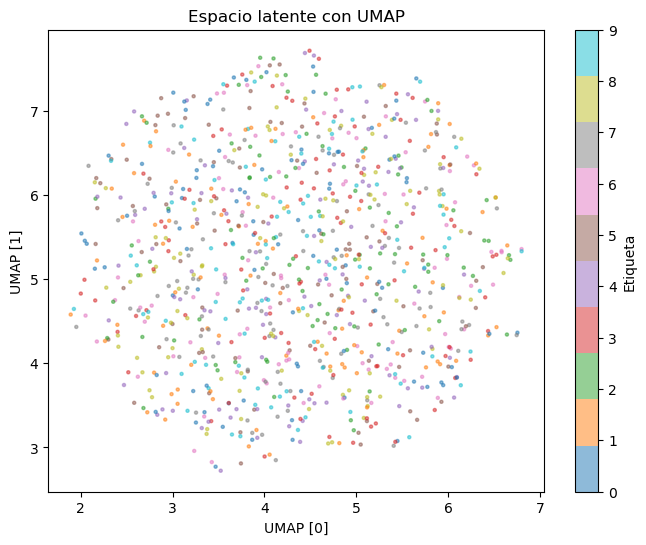

In [12]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(),"../..")))
from models.cVAE import CVAE
from keras.models import load_model
from Datos.Data_acq import get_mnist_data
#import Data_acq as data
import matplotlib.pyplot as plt
import importlib
from custom_layers.Sampling import Sampling
import importlib
import visualizaciones.visualizar as vis
import tensorflow as tf
from inferencias.inferencia import separar_digitos
from custom_layers.ReshapeLayer import ReshapeLayer
import numpy as np


dataset = "mnist"
x_train, x_test,x_val ,y_train, y_test,y_val, x_train_1, y_train_1 = get_mnist_data(dataset=dataset)


train_dataset = tf.data.Dataset.from_tensor_slices(((x_train, y_train), x_train))

val_dataset = tf.data.Dataset.from_tensor_slices(((x_val, y_val), x_val))

# Carpeta donde están los modelos
encoders_dir = "../../modelos_entrenados/encoders/"
decoders_dir = "../../modelos_entrenados/decoders/"

# Lista de nombres comunes de modelos
model_names = [
    #"int_128_lat_2_mnist",
    "int_128_lat_64_mnist",
    #"int_256_lat_64_mnist",
    #"int_256_lat_128_mnist",
    #"int_512_lat_256_mnist"    
]

predictor = load_model("../../modelos_entrenados/predictores/CCE_Conv2D.keras",
                       custom_objects={"ReshapeLayer": ReshapeLayer})
n_pictures = 1000
predicciones = []

for name in model_names:
    print(f"Procesando modelo: {name}")
    encoder_path = os.path.join(encoders_dir, f"en_{name}.keras")
    decoder_path = os.path.join(decoders_dir, f"de_{name}.keras")

    # Cargar modelos
    encoder = load_model(encoder_path, custom_objects={"Sampling": Sampling})
    decoder = load_model(decoder_path)

    # Instanciar CVAE
    cvae = CVAE(encoder=encoder, decoder=decoder, original_dim=28*28, beta=1.0)
    # Graficar espacio latente
    _ , _ , prediccion = separar_digitos(x_train[0:n_pictures],x_train_1[0:n_pictures],y_train[0:n_pictures],
                     y_train_1[0:n_pictures],cvae,predictor,Iterations=1,show_graph=False)
    
    predicciones.append(prediccion)

predicciones = np.array(predicciones)

print(x_train[0:n_pictures].shape)
print(predicciones[0].shape)


inf_dataset = tf.data.Dataset.from_tensor_slices(((x_train[0:n_pictures], predicciones[0]), x_train[0:n_pictures]))

plt.figure()
vis.latent_space_umap(cvae, val_dataset, max_samples = 1000)
#save_path=f"figs/umap_latente_{name}.png"

No hay cambios apreciables